# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

def load_traffic_dataset():
    '''Loads German Traffic Dataset.
    Returns a tuple as (X_train, y_train, X_valid, y_valid, X_test, y_test)
    '''
    training_file = './train.p'
    validation_file= './valid.p'
    testing_file = './test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    return (train['features'], train['labels'], valid['features'], valid['labels'], 
                test['features'], test['labels'])

# Load traffic dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_traffic_dataset()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import pandas as pd

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_valid = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of an traffic sign image?
image_shape = X_train[0].shape
     
# unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print('Number of validation examples = ', n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Create a Pandas dataframe from label->sign_name
signnames_df = pd.read_csv('signnames.csv')

# Create a Pandas Series from class labels
y_train_df = pd.DataFrame(y_train, columns=['ClassId'])
y_train_df = pd.merge(y_train_df, signnames_df, on='ClassId')
print()
print('First few entries of y_train_df: ')
print(y_train_df.head())

# Get sign name counts in training set
signname_counts = y_train_df.SignName.value_counts()
print()
print('Top 5 Signs that have more data in Training Set: ')
print(signname_counts.head())
print()
print('Signs that have less data in Training Set (showing bottom 5): ')
print(signname_counts.tail())

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

First few entries of y_train_df: 
   ClassId           SignName
0       41  End of no passing
1       41  End of no passing
2       41  End of no passing
3       41  End of no passing
4       41  End of no passing

Top 5 Signs that have more data in Training Set: 
Speed limit (50km/h)    2010
Speed limit (30km/h)    1980
Yield                   1920
Priority road           1890
Keep right              1860
Name: SignName, dtype: int64

Signs that have less data in Training Set (showing bottom 5): 
End of no passing              210
Pedestrians                    210
Go straight or left            180
Dangerous curve to the left    180
Speed limit (20km/h)           180
Name: SignName, dtype: int64


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class Label: 4
Sign Name: Speed limit (70km/h)


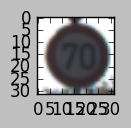

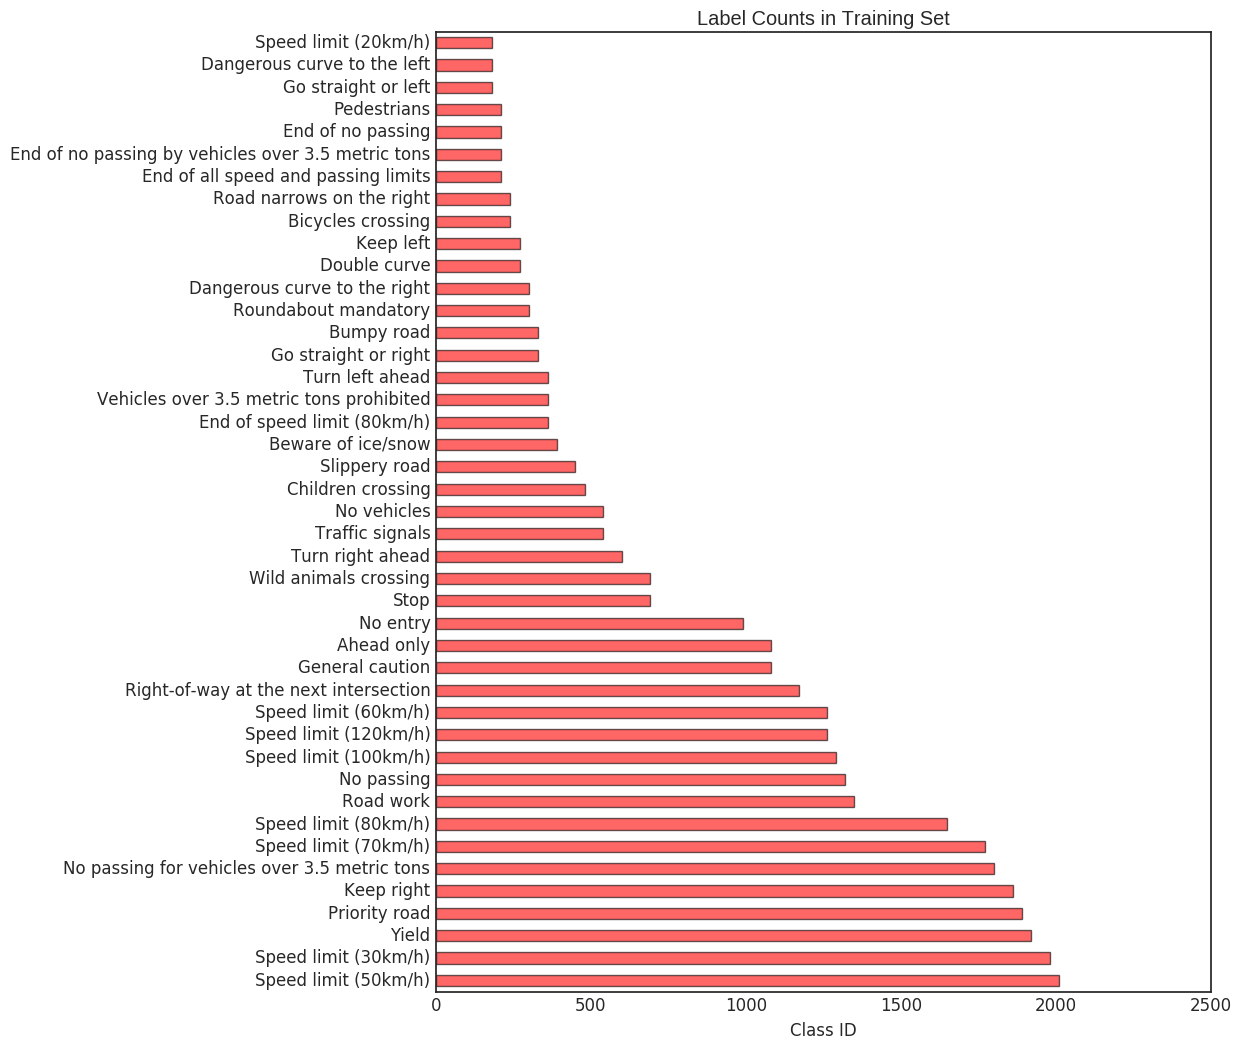

In [4]:
### Data exploration visualization code goes here.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.style.use('default')

# Visualize an image randomly
index = random.randint(0, n_train)
print('Class Label: {}'.format(y_train[index]))
print('Sign Name: {}'.format(signnames_df.SignName.iloc[y_train[index]]))
plt.figure(figsize=(1,1))
plt.imshow(X_train[index])
plt.show()

# Visualize the number of images available for each class label in training data
plt.style.use('seaborn-white')

# Display a bar chart of counts
#signname_counts.sort_index(inplace=True)
ax=signname_counts.plot(kind='barh', figsize=(10,12), color='r', alpha=0.6, title='Label Counts in Training Set')
ax.set_xlabel('Class ID')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import cv2 
# Some of the normalization choices or preprocessing steps:
# Range conversion or Rescaling or Min-Max scaling
# Per-pixel mean subtraction
# Zero center the data with unit variance (feature standardization) (each pixel is a feature)
# Convert to Grayscale
# Convert to YCrCb
    
def zero_center(X):
    '''X is a dataset of shape (n_examples, H, W, C) such as training set, valid set or test set'''
    # per feature mean subtraction
    X = X - np.mean(X, axis=0)
    # optionally divide by standard deviation
    #if True:
        #X = X / np.std(X, axis=0)
    return X

# Feature scaling
def rescale(X, newmin=0.0, newmax=1.0):
    '''This is a per pixel operation. Following are different types of X that are handled by this function:
    X is of shape (n_examples, H, W, C) i.e. a training set, valid set or test set or a batch of it.
    X is of shape (H, W, C) i.e. a color image
    X is of shape (H, W) i.e. a grayscale image
    '''
    assert X.dtype == np.uint8, 'Expecting image_data to be of type uint8'
    def rescale_for_gray(image_data, newmin, newmax):
        # image_data is grayscale image of shape (H,W)
        min_value = np.min(image_data)
        max_value = np.max(image_data)
        return newmin + ( (image_data-min_value)/(max_value-min_value) ) * (newmin-newmin)

    def rescale_for_color(image_data, newmin, newmax):
        image_shape = image_data.shape
        for c in range(image_shape[-1]):
            channel = image_data[:,:,c]
            min_value = np.min(channel)
            max_value = np.max(channel)
            image_data[:,:,c] = newmin + ( (channel-min_value)/(max_value-min_value) ) * (newmax-newmin)
        return image_data    

    X = X.astype(np.float32)
    xshape = X.shape
    if len(xshape) == 4:
        # X is assumed to of (n_example, H, W, C)
        # rescale each image in the data
        retX = np.array([rescale_for_color(image, newmin, newmax) for image in X])
        return retX
    elif len(xshape) == 3:
        # X is assumed to be of shape (H, W, C)
        return rescale_for_color(X, newmin, newmax)
    elif len(xshape) == 2:
        # X is assumed to be grayscale image: (H,W)
        return rescale_for_gray(X, newmin, newmax)
    assert False, 'An input of wrong shape is passed'


# Convert to grayscale
def convert_to_grayscale(X):
    '''X is a dataset of shape (n_examples, H, W, C) such as training set, valid set or test set.
    X is expected to be in RGB format
    '''
    # Note that openccv cvtColor expects input image type to be uint8, uint16 or float32
    assert X.shape[-1] == 3, 'Expecting a color image for grayscale conversion'
    n_examples, H, W, C = X.shape

    retX = np.array([cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY) for color_image in X])
    # reshape it so that the return output is of shape (n_example, H, W, 1)
    retX = retX.reshape(n_examples, H, W, 1)
    return retX

def convert_to_YCrCb(X):
    '''X is a dataset of shape (n_examples, H, W, C) such as training set, valid set or test set.
    X is expected to be in RGB format
    '''
    # Note that openccv cvtColor expects input image type to be uint8, uint16 or float32
    assert X.shape[-1] == 3, 'Expecting a color image for YCrCb conversion'

    retX = np.array([cv2.cvtColor(color_image, cv2.COLOR_RGB2YCR_CB) for color_image in X])
    assert X.shape == retX.shape, 'Hmm, shapes dont match after conversion to YCrCb'
    return retX


In [6]:
# Preprocessing Pipeline
# Apply scaling first
# Apply grayscale conversion if necessary
# Apply 'zero-center-unit-variance' standardization
def preprocessing_pipeline(X_data, fns=[rescale]):
    '''Preprocessing pipeline for input data.
    X_data can be training set, validation set or test set. Shape expected is: [n_examples,H,W,C]
    fns: list of functions that the data is run through.
    Example Usage:
        preprocessing_pipelin(X_train, fns=[rescale, zero_center_with_unit_variance])
        preprocessing_pipelin(X_train, fns=[rescale, convert_to_grayscale, zero_center_with_unit_variance])
    Returns output that is of same shape i.e. (n_examples,H,W,C) (if you apply grayscaling C will change)
    '''
    retX = X_data
    for func in fns:
        retX = func(retX)
    return retX

In [7]:
# Apply Preprocessing

# Load traffic dataset if required
X_train, y_train, X_valid, y_valid, X_test, y_test = load_traffic_dataset()

X_train = preprocessing_pipeline(X_train, fns=[rescale, convert_to_grayscale, zero_center])
X_valid = preprocessing_pipeline(X_valid, fns=[rescale, convert_to_grayscale])
X_test = preprocessing_pipeline(X_test, fns=[rescale, convert_to_grayscale])

print('Input Image dtype: ', X_train[0].dtype)
print('Training Set shape: {}'.format(X_train.shape))
print('min(Image[10] = {}, max(Image[10]) = {}'.format(X_train[10].min(), X_train[10].max()))


Input Image dtype:  float32
Training Set shape: (34799, 32, 32, 1)
min(Image[10] = -0.2925944924354553, max(Image[10]) = 0.6026674509048462


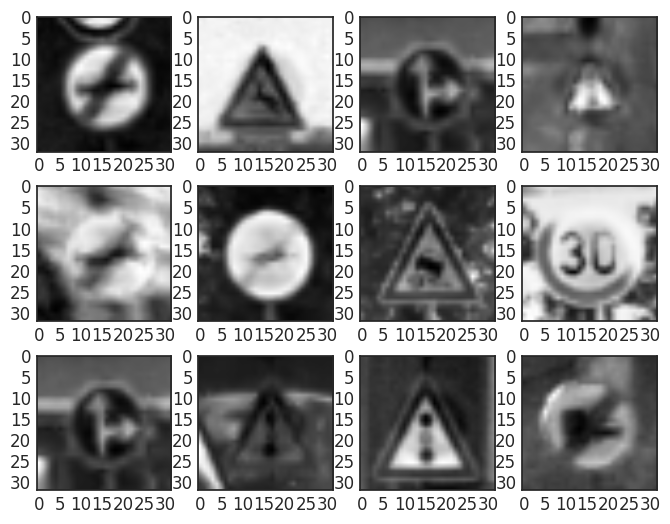

In [8]:
def show_images(X_train, X_valid, X_test, indices):
    '''X_* is of shape (n_examples, H, W, C)
    indices = list of list of indexes
    '''
    #plt.figure(figsize=(2,2))
    n_images_to_show_in_each_row = len(indices[0])
    counter = 1
    # Display train images
    for index in indices[0]:
        plt.subplot(3, n_images_to_show_in_each_row, counter)
        if X_train.shape[-1] == 1:
            plt.imshow(X_train[index].squeeze(), cmap='gray')
        else:
            plt.imshow(X_train[index])
        counter += 1
    
    # Display validation images
    for index in indices[1]:
        plt.subplot(3, n_images_to_show_in_each_row, counter)
        if X_train.shape[-1] == 1:
            plt.imshow(X_train[index].squeeze(), cmap='gray')
        else:
            plt.imshow(X_train[index])
        counter += 1

    # Display test images
    for index in indices[2]:
        # Display X_train images
        plt.subplot(3, n_images_to_show_in_each_row, counter)
        if X_train.shape[-1] == 1:
            plt.imshow(X_train[index].squeeze(), cmap='gray')
        else:
            plt.imshow(X_train[index])
        counter += 1
    
    plt.show()

# Show few images from X_train, X_valid, X_test
show_images(X_train, X_valid, X_test, [[10, 600, 900, 1500], [40,150,1900,3200], [900,1300,1700,9800]])

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def get_weights(shape, mu=0.0, sigma=0.01):
    w = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    return w

def get_bias(n_labels):
    return tf.Variable(tf.zeros(n_labels))

# Started wit LeNet5 implementation and used Dropout
def TrafficSignClassifierModel(x, keep_prob):
    # Arguments used for tf.truncated_normal -- which is used to randomly initialize weights and biases for each layer
    mu = 0.0
    sigma = 0.1

    # Layer1: Convolutional: Input = 32x32x1, Output = 28x28x6
    l1_w = get_weights(shape=(5,5,1,6), mu=mu, sigma=sigma)
    l1_b = get_bias(6)
    l1_conv = tf.nn.conv2d(x, l1_w, strides=[1,1,1,1], padding='VALID') + l1_b

    # Layer1: Activation
    l1_conv = tf.nn.elu(l1_conv)

    # Layer1: Pooling: Input = 28x28x6, Output = 14x14x6
    l1_conv = tf.nn.max_pool(l1_conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Layer1: Dropout
    l1_conv = tf.nn.dropout(l1_conv, keep_prob)
    
    tf.add_to_collection('Layers', l1_conv)

    # Layer2: Convolutional: Input = 14x14x6, Output = 10x10x16
    l2_w = get_weights(shape=(5,5,6,16), mu=mu, sigma=sigma)
    l2_b = get_bias(16)
    l2_conv = tf.nn.conv2d(l1_conv, l2_w, strides=[1,1,1,1], padding='VALID') + l2_b

    # Layer2: Activation
    l2_conv = tf.nn.elu(l2_conv)    

    # Layer2: Pooling: Input = 10x10x16, Output = 5x5x16
    l2_conv = tf.nn.max_pool(l2_conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Layer2: Dropout
    l2_conv = tf.nn.dropout(l2_conv, keep_prob)
    
    tf.add_to_collection('Layers', l2_conv)
    
    # Flatten the output from layer2 to create a 1D input as the next layer is fully connected layer
    flattened_l2_conv = tf.contrib.layers.flatten(l2_conv)

    # Layer3: Fully Connected: Input = 400, Output = 120
    l3_w = get_weights(shape=(400,120), mu=mu, sigma=sigma)
    l3_b = get_bias(120)
    l3_fc = tf.matmul(flattened_l2_conv, l3_w) + l3_b

    # Layer3: Activation
    l3_fc = tf.nn.elu(l3_fc)
    
    # Layer3: Dropout
    l3_fc = tf.nn.dropout(l3_fc, keep_prob)
    
    # Layer4: Fully Connected: Input = 120, Output = 84
    l4_w = get_weights(shape=(120,84), mu=mu, sigma=sigma)
    l4_b = get_bias(84)
    l4_fc = tf.matmul(l3_fc, l4_w) + l4_b

    # Layer4: Activation
    l4_fc = tf.nn.elu(l4_fc)
    
    # Layer4: Dropout
    l4_fc = tf.nn.dropout(l4_fc, keep_prob)

    # Layer5: Fully Connected (Logits): Input = 84, Output = n_classes
    l5_w = get_weights(shape=(84,n_classes), mu=mu, sigma=sigma)
    l5_b = get_bias(n_classes)
    l5_fc_logits = tf.matmul(l4_fc, l5_w) + l5_b

    return l5_fc_logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [66]:
import tensorflow as tf
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Features and Labels
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
y = tf.placeholder(tf.int32, shape=(None))
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline
learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
logits = TrafficSignClassifierModel(x, keep_prob)
prediction = tf.nn.softmax(logits)
top_5_predictions = tf.nn.top_k(prediction, k=5)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# Compute loss: Average Cross Entropy
loss_op = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss_op)

# Model Evaluation
is_correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y,1))
accuracy_op = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# init op (my TF version is : 0.11.0rc1)
#init_op = tf.global_variables_initializer()
init_op = tf.initialize_all_variables()


def evaluate(X_data, y_data):
    session = tf.get_default_session()
    accuracy_value = session.run(fetches=accuracy_op, feed_dict={x: X_data, y: y_data, keep_prob: 1.0})
    return accuracy_value


In [12]:
import math
from sklearn.utils import shuffle

# Training Configuration
# Configuration 1:
#    EPOCHS: 10
#    BATCH_SIZE: one of {50,100,300,500,1000}
#    LEARNING RAGE:  0.001
#    KEEP_PROB: 0.7

# Configuration 2:
#    EPOCHS: 50
#    BATCH_SIZE: 500
#    LEARNING RATE:  one of {0.1, 0.01, 0.05, 0.005, 0.001}
#    KEEP_PROB: 0.7

# Configuration 3:
#    EPOCHS: 50
#    BATCH_SIZE: 50
#    LEARNING RATE:  0.001
#    KEEP_PROB: one of {0.6,0.7,0.75}


EPOCHS = 20
BATCH_SIZE = 50
LEARNING_RATE = 0.001
KEEP_PROB = 0.7

training_config = []
for batch_sz in [50, 100, 300, 500, 1000]:
    training_config.append((EPOCHS,batch_sz,LEARNING_RATE,KEEP_PROB))
for lrate in [0.1, 0.01, 0.05, 0.005, 0.001]:
    training_config.append((EPOCHS, BATCH_SIZE, lrate, KEEP_PROB))
for kprob in [0.6,0.7,0.75]:
    training_config.append((EPOCHS, BATCH_SIZE, lrate, kprob))
training_config = set(training_config)
#training_config = training_config[-1:]
print(training_config)

{(20, 1000, 0.001, 0.7), (20, 100, 0.001, 0.7), (20, 300, 0.001, 0.7), (20, 50, 0.1, 0.7), (20, 50, 0.05, 0.7), (20, 50, 0.001, 0.7), (20, 50, 0.001, 0.6), (20, 500, 0.001, 0.7), (20, 50, 0.001, 0.75), (20, 50, 0.01, 0.7), (20, 50, 0.005, 0.7)}


In [13]:
# Train
# Validation accuracies from all configurations
acc_outputs = dict()

for config in training_config:
    # record validation accuracies from all epochs in one training cycle
    record_valid_acc = []
    n_epochs, batch_sz, lr, kp = config
    print()
    print('Current Configuration:')
    print('\tnum_epochs: {}, batch_size: {}, learning_rate: {}, keep_prob: {}'.format(n_epochs, batch_sz, lr, kp))
    with tf.Session() as session:
        session.run(init_op)
        max_batches = int(math.ceil(n_train/batch_sz))
        print('max_batches: ', max_batches)
        
        # Training Cycles
        for epoch in range(n_epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for batch_j in range(max_batches):
                batch_start_index = batch_j * batch_sz
                current_batch_x = X_train[batch_start_index:batch_start_index+batch_sz]
                current_batch_y = y_train[batch_start_index:batch_start_index+batch_sz]
                session.run(fetches=training_op, feed_dict={x: current_batch_x, y: current_batch_y,
                                                        learning_rate: lr, keep_prob: kp})
    
            # One Epoch complete. Evaluate the accuracy on validation set
            validation_accuracy = evaluate(X_valid, y_valid)
            record_valid_acc.append(validation_accuracy)
            if (epoch+1) % 5 == 0:
                print('Epoch {} complete and validation accuracy = {:.3f}'.format(epoch+1, validation_accuracy))
    # Training complete with one configuration. Store validation accuracies in acc_outputs
    acc_outputs[config] = record_valid_acc


Current Configuration:
	num_epochs: 20, batch_size: 1000, learning_rate: 0.001, keep_prob: 0.7
max_batches:  35
Epoch 5 complete and validation accuracy = 0.768
Epoch 10 complete and validation accuracy = 0.827
Epoch 15 complete and validation accuracy = 0.850
Epoch 20 complete and validation accuracy = 0.861

Current Configuration:
	num_epochs: 20, batch_size: 100, learning_rate: 0.001, keep_prob: 0.7
max_batches:  348
Epoch 5 complete and validation accuracy = 0.880
Epoch 10 complete and validation accuracy = 0.911
Epoch 15 complete and validation accuracy = 0.926
Epoch 20 complete and validation accuracy = 0.933

Current Configuration:
	num_epochs: 20, batch_size: 300, learning_rate: 0.001, keep_prob: 0.7
max_batches:  116
Epoch 5 complete and validation accuracy = 0.832
Epoch 10 complete and validation accuracy = 0.880
Epoch 15 complete and validation accuracy = 0.887
Epoch 20 complete and validation accuracy = 0.902

Current Configuration:
	num_epochs: 20, batch_size: 50, learnin

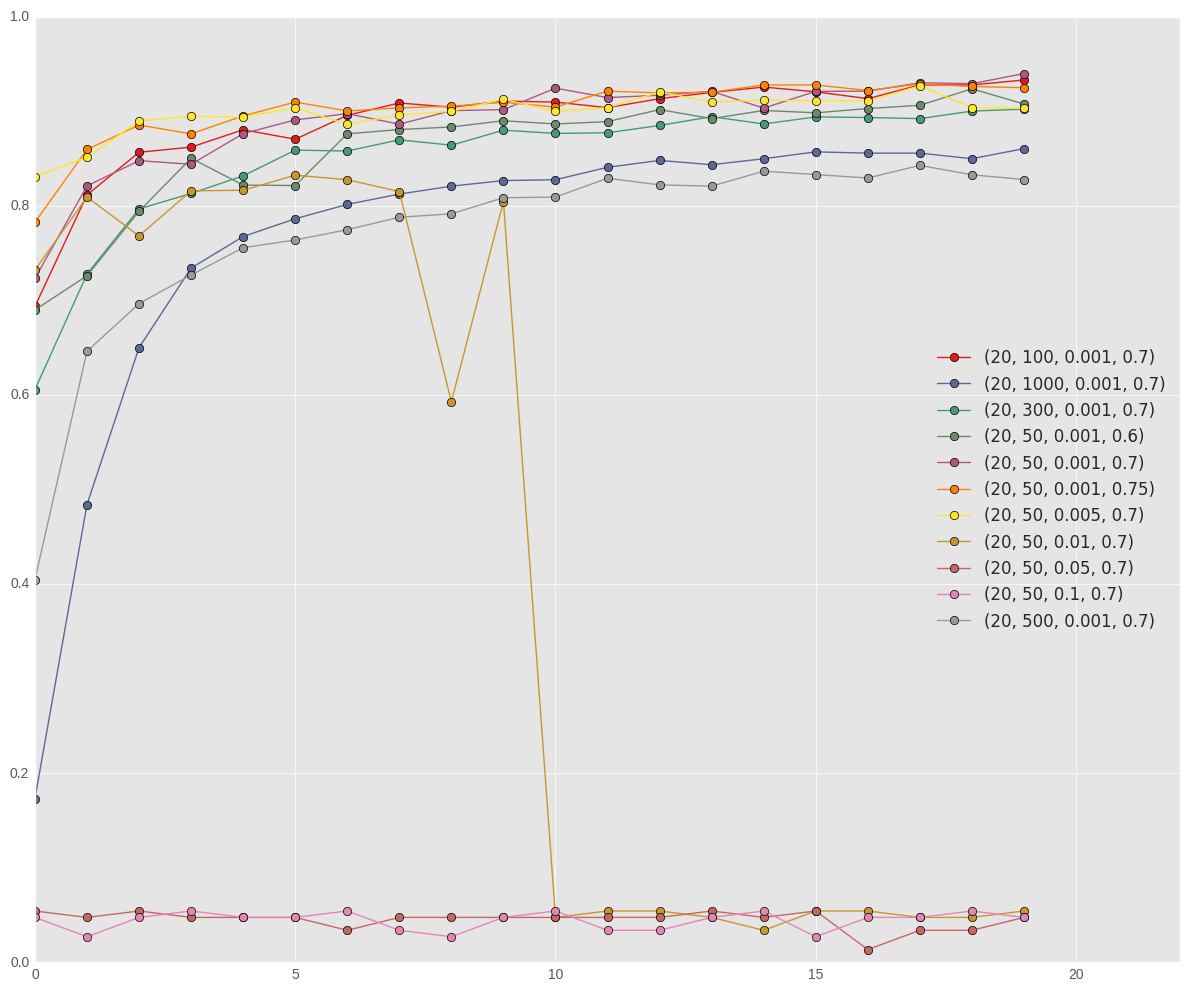

Showing the validation accuracy values for last few epochs from all configuration tried: 


,"(20, 100, 0.001, 0.7)","(20, 1000, 0.001, 0.7)","(20, 300, 0.001, 0.7)","(20, 50, 0.001, 0.6)","(20, 50, 0.001, 0.7)","(20, 50, 0.001, 0.75)","(20, 50, 0.005, 0.7)","(20, 50, 0.01, 0.7)","(20, 50, 0.05, 0.7)","(20, 50, 0.1, 0.7)","(20, 500, 0.001, 0.7)"
15,0.920635,0.857143,0.894105,0.898413,0.921089,0.927891,0.911111,0.054422,0.054422,0.027211,0.833107
16,0.913379,0.855783,0.893424,0.902948,0.921315,0.921996,0.911111,0.054422,0.013605,0.047619,0.829479
17,0.927891,0.855783,0.892291,0.906349,0.930159,0.929025,0.926984,0.047619,0.034014,0.047619,0.842857
18,0.927891,0.849887,0.900227,0.923810,0.929252,0.926304,0.903855,0.047619,0.034014,0.054422,0.832880
19,0.933107,0.860544,0.902268,0.907710,0.939910,0.924944,0.903175,0.054422,0.047619,0.047619,0.827891


In [14]:
# Visualization of validation accuracies from all configurations used
plt.style.use('ggplot')

outdict = {}
for c in training_config:
    outdict[str(c)] = acc_outputs[c]
acc_df = pd.DataFrame(outdict)
ax=acc_df.plot(marker='o', cmap='Set1', figsize=(12,10))
ax.set_xlim([0,EPOCHS+2])
ax.set_ylim([0.0,1.0])
plt.tight_layout()
plt.show()
print('Showing the validation accuracy values for last few epochs from all configuration tried: ')
acc_df[15:]

In [15]:
# Pick the best training configuration and train for 60 EPOCHS
RESTART_FROM_SAVED_MODEL = False

# Saver
save_file = './traffic_sign_classifier.ckpt'
saver = tf.train.Saver()

n_epochs, batch_sz, lr, kp = 100, 50, 0.001, 0.7
print('Choosing the following configuration and training for more # of epochs:')
print('\tnum_epochs: {}, batch_size: {}, learning_rate: {}, keep_prob: {}'.format(n_epochs, batch_sz, lr, kp))
with tf.Session() as session:
    if RESTART_FROM_SAVED_MODEL:
        saver.restore(session, save_file)
    else:
        session.run(init_op)
    max_batches = int(math.ceil(n_train/batch_sz))
    print('max_batches: ', max_batches)

    for epoch in range(n_epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for batch_j in range(max_batches):
            batch_start_index = batch_j * batch_sz
            current_batch_x = X_train[batch_start_index:batch_start_index+batch_sz]
            current_batch_y = y_train[batch_start_index:batch_start_index+batch_sz]
            session.run(fetches=training_op, feed_dict={x: current_batch_x, y: current_batch_y,
                                                    learning_rate: lr, keep_prob: kp})

        # One Epoch complete. Evaluate the accuracy on validation set
        validation_accuracy = evaluate(X_valid, y_valid)
        if (epoch+1) % 5 == 0:
            print('Epoch {} complete and validation accuracy = {:.3f}'.format(epoch+1, validation_accuracy))
    # Save the model
    saver.save(session, save_file)
    print('Saved model @ ', save_file)
print('Trainig Complete.')

Choosing the following configuration and training for more # of epochs:
	num_epochs: 100, batch_size: 50, learning_rate: 0.001, keep_prob: 0.7
max_batches:  696
Epoch 5 complete and validation accuracy = 0.874
Epoch 10 complete and validation accuracy = 0.927
Epoch 15 complete and validation accuracy = 0.932
Epoch 20 complete and validation accuracy = 0.939
Epoch 25 complete and validation accuracy = 0.939
Epoch 30 complete and validation accuracy = 0.942
Epoch 35 complete and validation accuracy = 0.939
Epoch 40 complete and validation accuracy = 0.947
Epoch 45 complete and validation accuracy = 0.944
Epoch 50 complete and validation accuracy = 0.946
Epoch 55 complete and validation accuracy = 0.955
Epoch 60 complete and validation accuracy = 0.956
Epoch 65 complete and validation accuracy = 0.949
Epoch 70 complete and validation accuracy = 0.949
Epoch 75 complete and validation accuracy = 0.949
Epoch 80 complete and validation accuracy = 0.946
Epoch 85 complete and validation accurac

Epoch 100 complete and validation accuracy = 0.954
Saved model @  ./traffic_sign_classifier.ckpt
Trainig Complete.


In [16]:
# Evaluate Accuracy on Test Set
print('Evaluating Test Set Accuracy...')
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_accuracy = sess.run(fetches=accuracy_op, feed_dict={x: X_test, y: y_test, keep_prob: 1.0})
    print('Test Set Accuracy: {:.3f}'.format(test_accuracy))    

Evaluating Test Set Accuracy...
Test Set Accuracy: 0.929


In [20]:
# Evaluate Training Set accuracy also for reporting purposes
# Load traffic dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_traffic_dataset()
# Avoid zero centering
X_train = preprocessing_pipeline(X_train, fns=[rescale, convert_to_grayscale])

print('Evaluating Training Set Accuracy...')
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    train_accuracy = sess.run(fetches=accuracy_op, feed_dict={x: X_train, y: y_train, keep_prob: 1.0})
    print('Train Set Accuracy: {:.3f}'.format(train_accuracy))    

Evaluating Training Set Accuracy...
Train Set Accuracy: 0.986


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

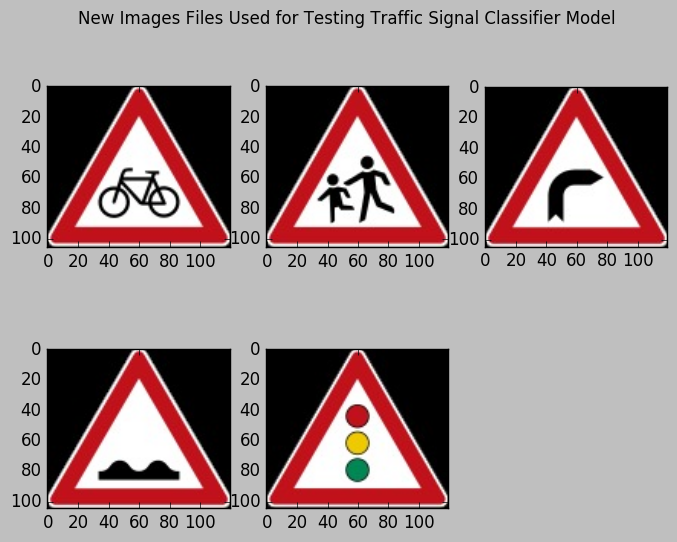

In [27]:
import cv2
import matplotlib.image as mplimg
import glob
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

plt.style.use('classic')
# New Images are downloaded from web. I named the files such that the last part after underscore contains the
# class label
new_image_files = glob.glob('./new_images/*.jpg')
X_new_data = [cv2.imread(image_file) for image_file in new_image_files]
X_new_data = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in X_new_data]
for j in range(len(new_image_files)):
    plt.subplot(2,3,j+1)
    plt.imshow(X_new_data[j])
    # Resize the images to 32x32 using opencv
    # Convert to BGR for any opencv processing
    X_new_data[j] = cv2.cvtColor(X_new_data[j], cv2.COLOR_RGB2BGR)
    # Scale data to 32x32
    X_new_data[j] = cv2.resize(X_new_data[j], (32,32), interpolation=cv2.INTER_CUBIC)
    X_new_data[j] = cv2.cvtColor(X_new_data[j], cv2.COLOR_BGR2RGB)
    # Display the 32x32 if want to
plt.suptitle('New Images Files Used for Testing Traffic Signal Classifier Model')
plt.show()

In [28]:
import os
# Get class labels for new image data
y_new_data = [int(os.path.splitext(f)[0].split('_')[-1]) for f in new_image_files]
print('Class Labels for new image data: ', y_new_data)
X_new_data = np.array(X_new_data)
y_new_data = np.array(y_new_data, dtype=np.int32)
print('Image Shape: ', X_new_data[0].shape)
print('Image dtype: ', X_new_data[0].dtype)
print('X_new_data and y_new_data are ready')

Class Labels for new image data:  [29, 28, 20, 22, 26]
Image Shape:  (32, 32, 3)
Image dtype:  uint8
X_new_data and y_new_data are ready


### Preprocess the data

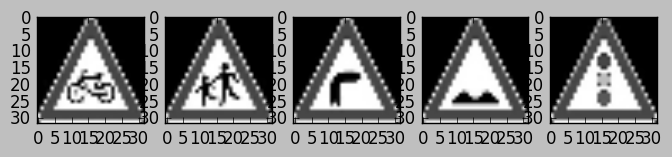

In [29]:
# Pass through the same feature scaling that was used to train the model
X_new_data = preprocessing_pipeline(X_new_data, fns=[rescale, convert_to_grayscale])
#X_new_data = np.array([convert_to_YCrCb(image) for image in X_new_data])
#X_new_data = np.array([feature_scale(image.astype(np.float32)) for image in X_new_data])

def show_new_data(X_data, indices):
    '''X_data is of shape (n_examples, H, W, C)
    indices = list of list of indexes
    '''
    #plt.figure(figsize=(2,2))
    n_images_to_show_in_each_row = len(indices)
    counter = 1
    # Display train images
    for index in indices:
        plt.subplot(3, n_images_to_show_in_each_row, counter)
        if X_data.shape[-1] == 1:
            plt.imshow(X_data[index].squeeze(), cmap='gray')
        else:
            plt.imshow(X_data[index])
        counter += 1
    plt.show()

# Display new data after preprocessing
show_new_data(X_new_data, range(len(X_new_data)))

### Predict the Sign Type for Each Image

In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print('Running model prediction on New Image Data...')
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    prediction_output = sess.run(fetches=prediction, feed_dict={x: X_new_data, y: y_new_data, keep_prob: 1.0 })
    print('Prediction: ', np.argmax(prediction_output, axis=1))
    print('Class Labels: ', y_new_data)

Running model prediction on New Image Data...
Prediction:  [29 28 20 22 26]
Class Labels:  [29 28 20 22 26]


### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.print('Evaluating Accuracy on New Image Data...')
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    new_data_acc = sess.run(fetches=accuracy_op,feed_dict={x: X_new_data, y: y_new_data, keep_prob: 1.0 })
    print('New Data Accuracy = ', new_data_acc)

New Data Accuracy =  1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [62]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# Saver
np.set_printoptions(suppress=True)
save_file = './traffic_sign_classifier.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    top_5_prediction_output = sess.run(fetches=top_5_predictions,feed_dict={x: X_new_data, y: y_new_data, keep_prob: 1.0 })
    print('Top 5 Prediction Probabilities: ')
    print(top_5_prediction_output.values)
    print()
    print('Top 5 Prediction Indices/Classes: ')
    print(top_5_prediction_output.indices)

# Print the outputs
print()
indices = top_5_prediction_output.indices
df = signnames_df.reset_index('ClassId')
for target, ind in zip(y_new_data, indices):
    print('For the Target Label "', df.iloc[target].SignName, '" top 5 classes predicted are: ')
    print(df.iloc[ind].SignName)
    print('-----')
    print()

Top 5 Prediction Probabilities: 
[[ 0.99886537  0.00068288  0.00040369  0.00003467  0.00001113]
 [ 1.          0.00000001  0.00000001  0.          0.        ]
 [ 0.99753076  0.00220433  0.00022909  0.00003039  0.00000536]
 [ 0.99999881  0.00000083  0.00000038  0.          0.        ]
 [ 0.99974483  0.00025505  0.00000013  0.00000003  0.        ]]

Top 5 Prediction Indices/Classes: 
[[29  3 23 35 22]
 [28 19 11 30 20]
 [20 23 41 19 42]
 [22 29 25 26 28]
 [26 18 27 11 30]]

For the Target Label " Bicycles crossing " top 5 classes predicted are: 
29       Bicycles crossing
3     Speed limit (60km/h)
23           Slippery road
35              Ahead only
22              Bumpy road
Name: SignName, dtype: object
-----

For the Target Label " Children crossing " top 5 classes predicted are: 
28                        Children crossing
19              Dangerous curve to the left
11    Right-of-way at the next intersection
30                       Beware of ice/snow
20             Dangerous curv

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [63]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    session = tf.get_default_session()
    activation = session.run(fetches=tf_activation,feed_dict={x : image_input, keep_prob: 1.0})
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

index: 15861, class: 38


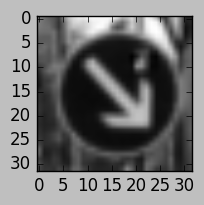

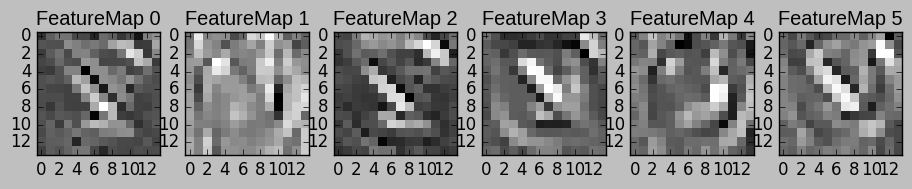

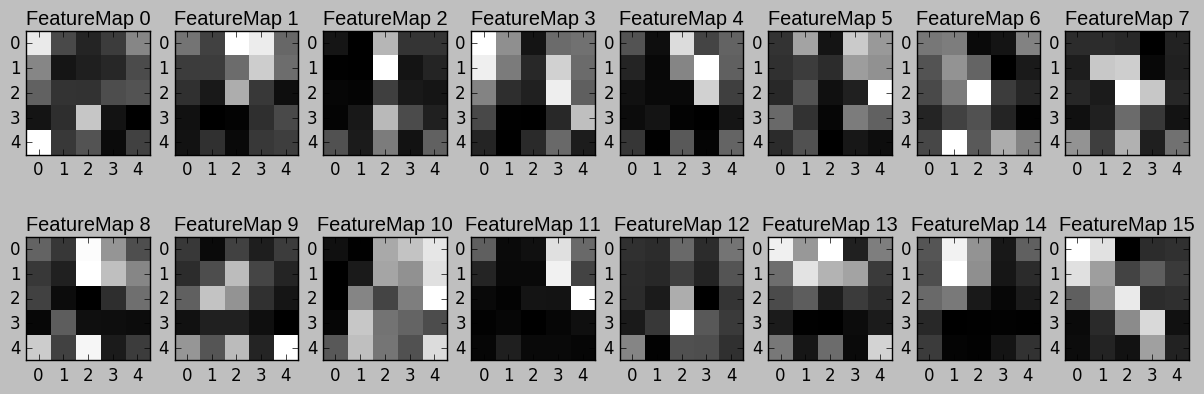

In [65]:
saver = tf.train.Saver()
with tf.Session() as session:
    saver.restore(session, save_file)
    l1_conv = tf.get_collection('Layers')[0]
    l2_conv = tf.get_collection('Layers')[1]
    index = random.randint(0, len(X_train))
    print('index: {}, class: {}'.format(index, y_train[index]))
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[index,:,:,0], cmap='gray')
    plt.show()
    outputFeatureMap(X_train[index:index+1], l1_conv, plt_num=1)
    outputFeatureMap(X_new_data[:1], l2_conv, plt_num=2)
plt.show()

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 